In [1]:
import torch
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import DRLPDE.neuralnets as neuralnets
import importlib

mpl.rcParams['figure.dpi'] = 600
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['font.size'] = 8

true_L2norm = np.sqrt(100.9340)
true_Linf = 13.4404

In [2]:
steps = [0, 10, 100, 1000]
true_L2norm = np.sqrt(100.9340)

nn1 = 'Stochastic_nn1'
nn2 = 'Stochastic_nn2'
nn3 = 'Stochastic_nn3'
nn4 = 'Stochastic_nn4'

with open('experiments/'  + nn1 + '_errors.pickle', 'rb') as f:
    nn_errors1 = pickle.load(f)
with open('experiments/'  + nn2 + '_errors.pickle', 'rb') as f:
    nn_errors2 = pickle.load(f)
with open('experiments/'  + nn3 + '_errors.pickle', 'rb') as f:
    nn_errors3 = pickle.load(f)
with open('experiments/'  + nn4 + '_errors.pickle', 'rb') as f:
    nn_errors4 = pickle.load(f)



In [3]:
L2nn_errors1 = np.sqrt(nn_errors1[:,0,0])/true_L2norm
L2nn_errors2 = np.sqrt(nn_errors2[:,0,0])/true_L2norm
L2nn_errors3 = np.sqrt(nn_errors3[:,0,0])/true_L2norm
L2nn_errors4 = np.sqrt(nn_errors4[:,0,0])/true_L2norm

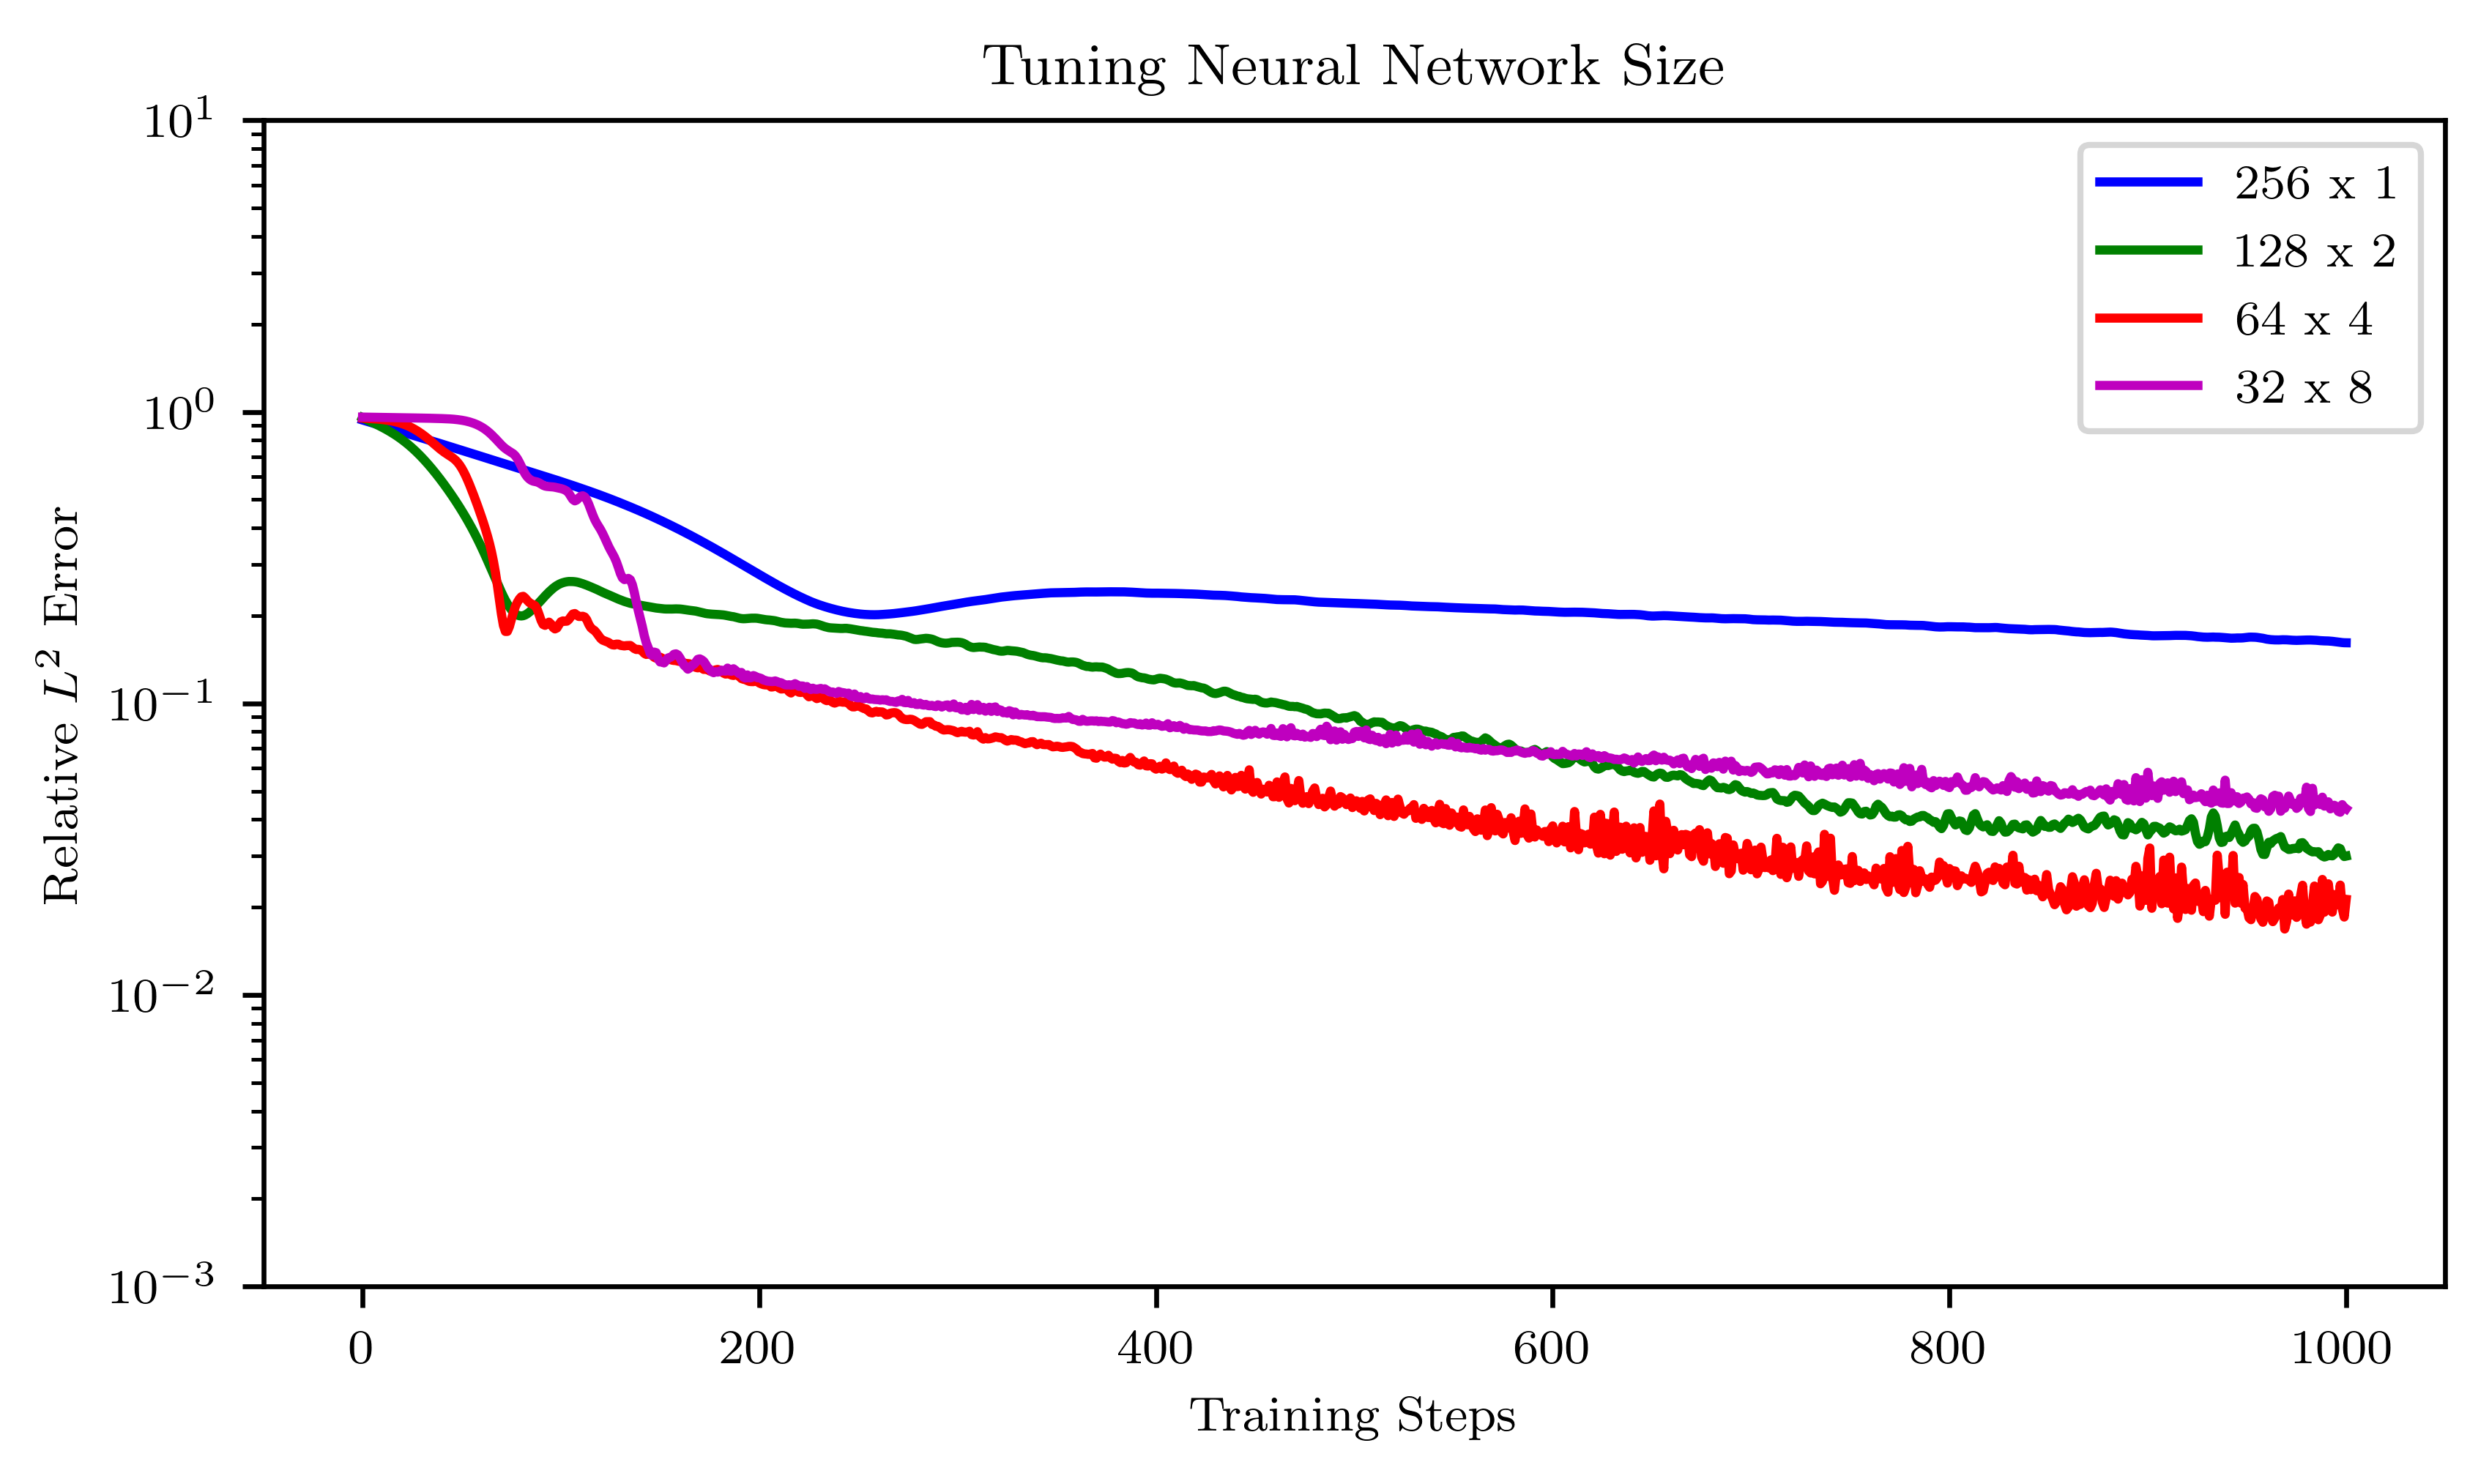

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Tuning Neural Network Size')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(range(1001), L2nn_errors1,'b')
ax.semilogy(range(1001), L2nn_errors2,'g')
ax.semilogy(range(1001), L2nn_errors3,'r')
ax.semilogy(range(1001), L2nn_errors4,'m')

ax.legend(['256 x 1', '128 x 2', '64 x 4', '32 x 8'])


In [8]:
ghost1 = 'Stochastic_ghost1'
ghost2 = 'Stochastic_ghost2'
ghost3 = 'Stochastic_ghost3'
ghost4 = 'Stochastic_ghost4'

with open('experiments/'  + ghost1 + '_errors.pickle', 'rb') as f:
    ghost_errors1 = pickle.load(f)
with open('experiments/'  + ghost2 + '_errors.pickle', 'rb') as f:
    ghost_errors2 = pickle.load(f)
with open('experiments/'  + ghost3 + '_errors.pickle', 'rb') as f:
    ghost_errors3 = pickle.load(f)
with open('experiments/'  + ghost4 + '_errors.pickle', 'rb') as f:
    ghost_errors4 = pickle.load(f)

L2ghost_errors1 = np.sqrt(ghost_errors1[:,0,0])/true_L2norm
L2ghost_errors2 = np.sqrt(ghost_errors2[:,0,0])/true_L2norm
L2ghost_errors3 = np.sqrt(ghost_errors3[:,0,0])/true_L2norm
L2ghost_errors4 = np.sqrt(ghost_errors4[:,0,0])/true_L2norm

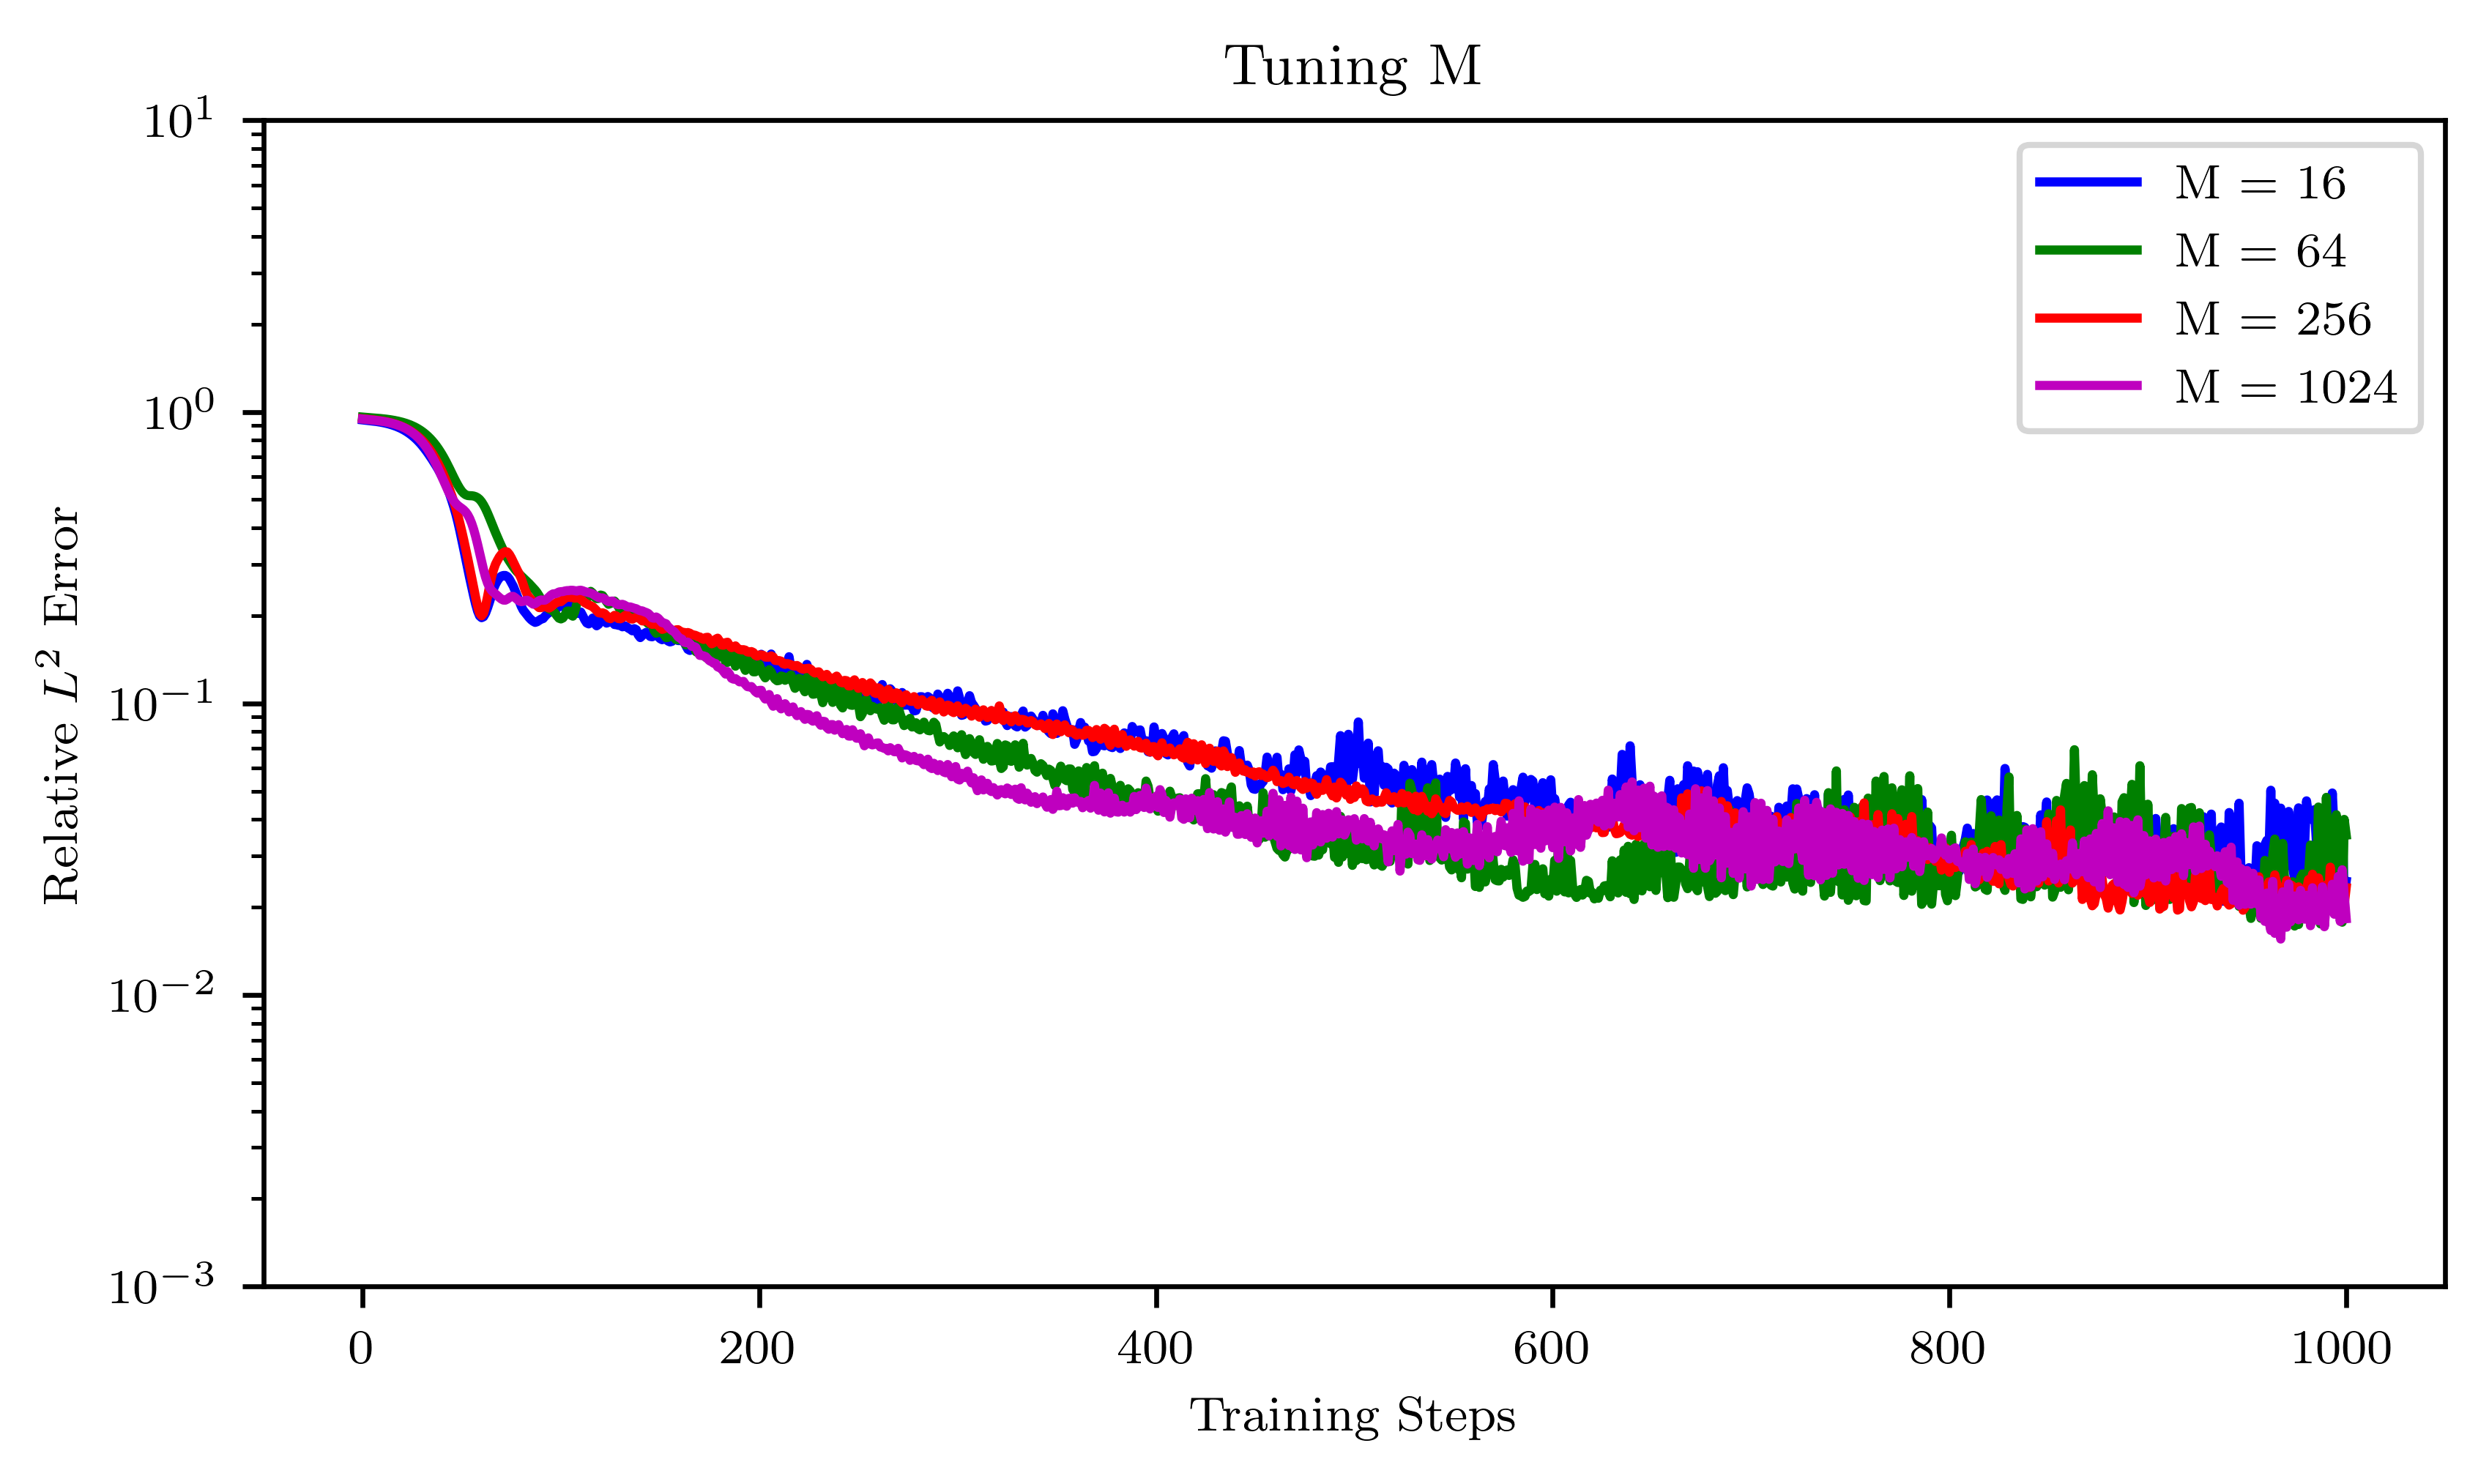

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Tuning M')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(range(1001), L2ghost_errors4,'b')
ax.semilogy(range(1001), L2ghost_errors3,'g')
ax.semilogy(range(1001), L2ghost_errors2,'r')
ax.semilogy(range(1001), L2ghost_errors1,'m')

ax.legend(['M = 16', 'M = 64', 'M =  256', 'M = 1024'])


In [11]:
dt1 = 'Stochastic_dt1'
dt2 = 'Stochastic_dt2'
dt3 = 'Stochastic_dt3'
dt4 = 'Stochastic_dt4'

with open('experiments/'  + dt1 + '_errors.pickle', 'rb') as f:
    dt_errors1 = pickle.load(f)
with open('experiments/'  + dt2 + '_errors.pickle', 'rb') as f:
    dt_errors2 = pickle.load(f)
with open('experiments/'  + dt3 + '_errors.pickle', 'rb') as f:
    dt_errors3 = pickle.load(f)
with open('experiments/'  + dt4 + '_errors.pickle', 'rb') as f:
    dt_errors4 = pickle.load(f)

with open('experiments/'  + dt1 + '_losses.pickle', 'rb') as f:
    dt_losses1 = pickle.load(f)
with open('experiments/'  + dt2 + '_losses.pickle', 'rb') as f:
    dt_losses2 = pickle.load(f)
with open('experiments/'  + dt3 + '_losses.pickle', 'rb') as f:
    dt_losses3 = pickle.load(f)
with open('experiments/'  + dt4 + '_losses.pickle', 'rb') as f:
    dt_losses4 = pickle.load(f)

L2dt_errors1 = np.sqrt(dt_errors1[:,0,0])
L2dt_errors2 = np.sqrt(dt_errors2[:,0,0])
L2dt_errors3 = np.sqrt(dt_errors3[:,0,0])
L2dt_errors4 = np.sqrt(dt_errors4[:,0,0])

L2dt_losses1 = np.sqrt(dt_losses1[:,0,0])
L2dt_losses2 = np.sqrt(dt_losses2[:,0,0])
L2dt_losses3 = np.sqrt(dt_losses3[:,0,0])
L2dt_losses4 = np.sqrt(dt_losses4[:,0,0])

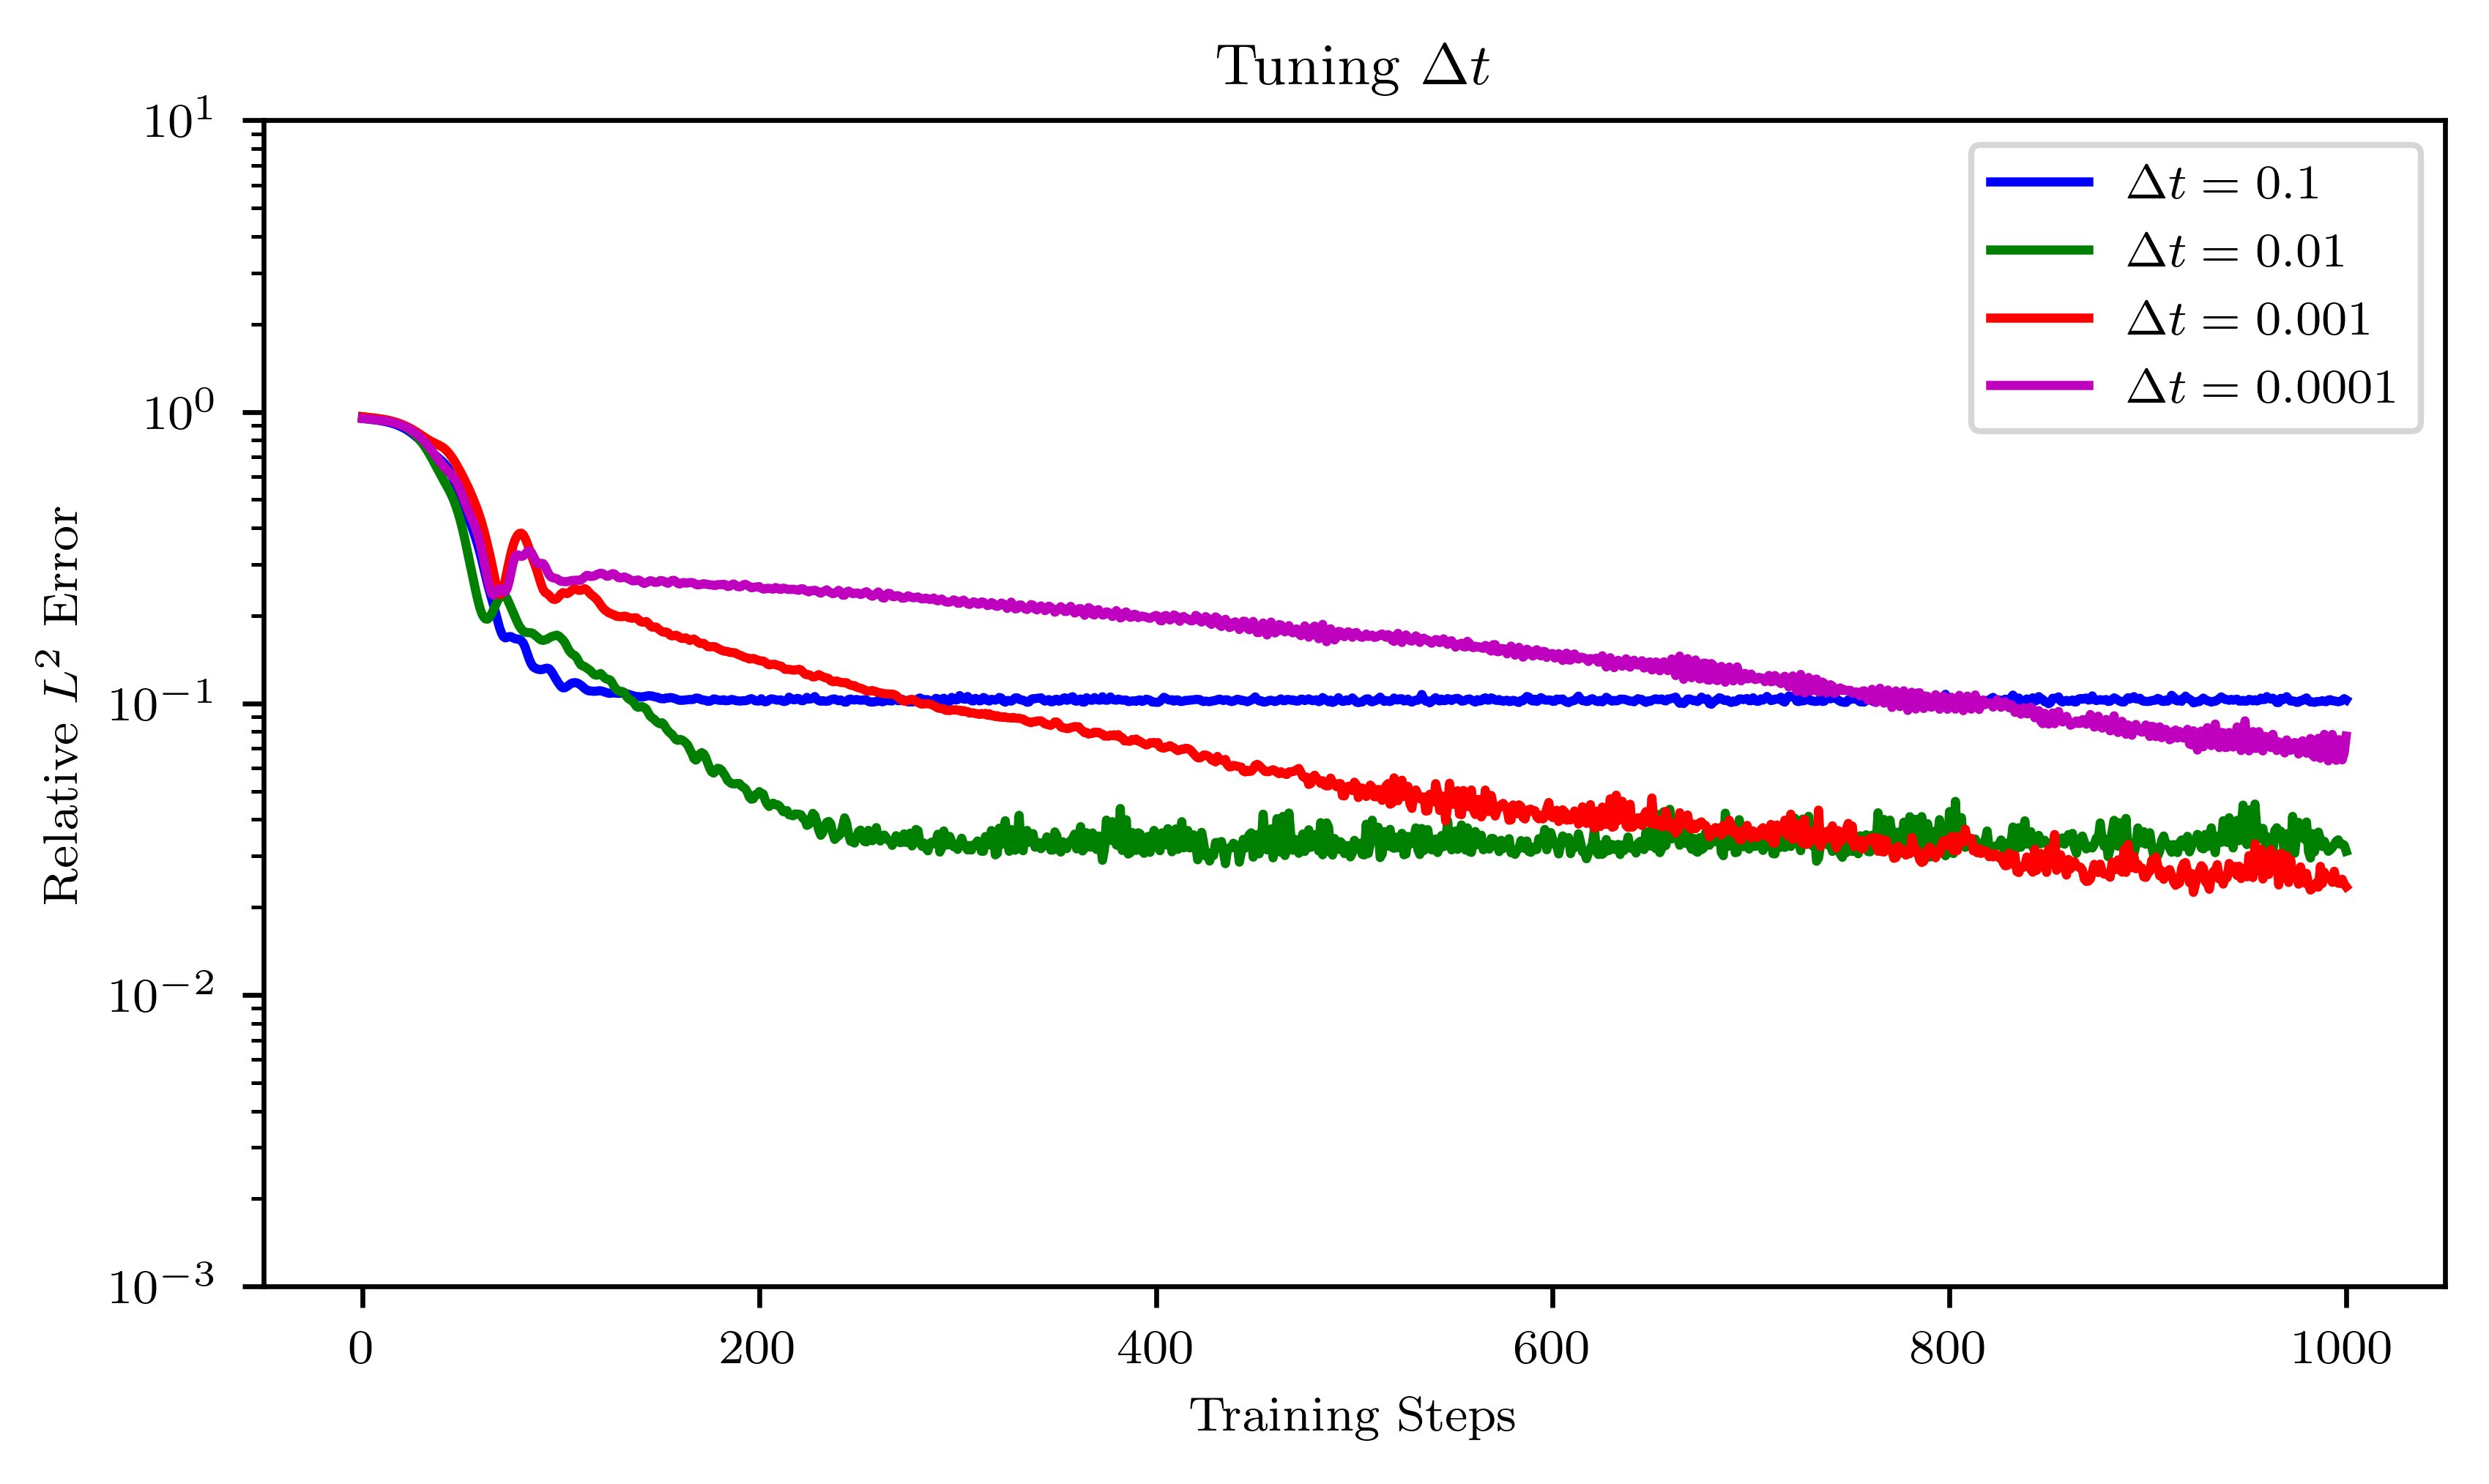

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Tuning $\Delta t$')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)
ax.semilogy(range(1001), L2dt_errors1/true_L2norm,'b')
ax.semilogy(range(1001), L2dt_errors2/true_L2norm,'g')
ax.semilogy(range(1001), L2dt_errors3/true_L2norm,'r')
ax.semilogy(range(1001), L2dt_errors4/true_L2norm,'m')

ax.legend([r'$\Delta t = 0.1$', r'$\Delta t = 0.01$', r'$\Delta t = 0.001$', r'$\Delta t = 0.0001$'])


In [22]:
dt_noscale1 = 'Stochastic_dt_noscale1'
dt_noscale2 = 'Stochastic_dt_noscale2'
dt_noscale3 = 'Stochastic_dt_noscale3'
dt_noscale4 = 'Stochastic_dt_noscale4'

with open('experiments/'  + dt_noscale1 + '_errors.pickle', 'rb') as f:
    dt_noscale_errors1 = pickle.load(f)
with open('experiments/'  + dt_noscale2 + '_errors.pickle', 'rb') as f:
    dt_noscale_errors2 = pickle.load(f)
with open('experiments/'  + dt_noscale3 + '_errors.pickle', 'rb') as f:
    dt_noscale_errors3 = pickle.load(f)
with open('experiments/'  + dt_noscale4 + '_errors.pickle', 'rb') as f:
    dt_noscale_errors4 = pickle.load(f)

with open('experiments/'  + dt_noscale1 + '_losses.pickle', 'rb') as f:
    dt_noscale_losses1 = pickle.load(f)
with open('experiments/'  + dt_noscale2 + '_losses.pickle', 'rb') as f:
    dt_noscale_losses2 = pickle.load(f)
with open('experiments/'  + dt_noscale3 + '_losses.pickle', 'rb') as f:
    dt_noscale_losses3 = pickle.load(f)
with open('experiments/'  + dt_noscale4 + '_losses.pickle', 'rb') as f:
    dt_noscale_losses4 = pickle.load(f)

L2dt_noscale_errors1 = np.sqrt(dt_noscale_errors1[:,0,0])
L2dt_noscale_errors2 = np.sqrt(dt_noscale_errors2[:,0,0])
L2dt_noscale_errors3 = np.sqrt(dt_noscale_errors3[:,0,0])
L2dt_noscale_errors4 = np.sqrt(dt_noscale_errors4[:,0,0])

L2dt_noscale_losses1 = np.sqrt(dt_noscale_losses1[:,0,0])
L2dt_noscale_losses2 = np.sqrt(dt_noscale_losses2[:,0,0])
L2dt_noscale_losses3 = np.sqrt(dt_noscale_losses3[:,0,0])
L2dt_noscale_losses4 = np.sqrt(dt_noscale_losses4[:,0,0])

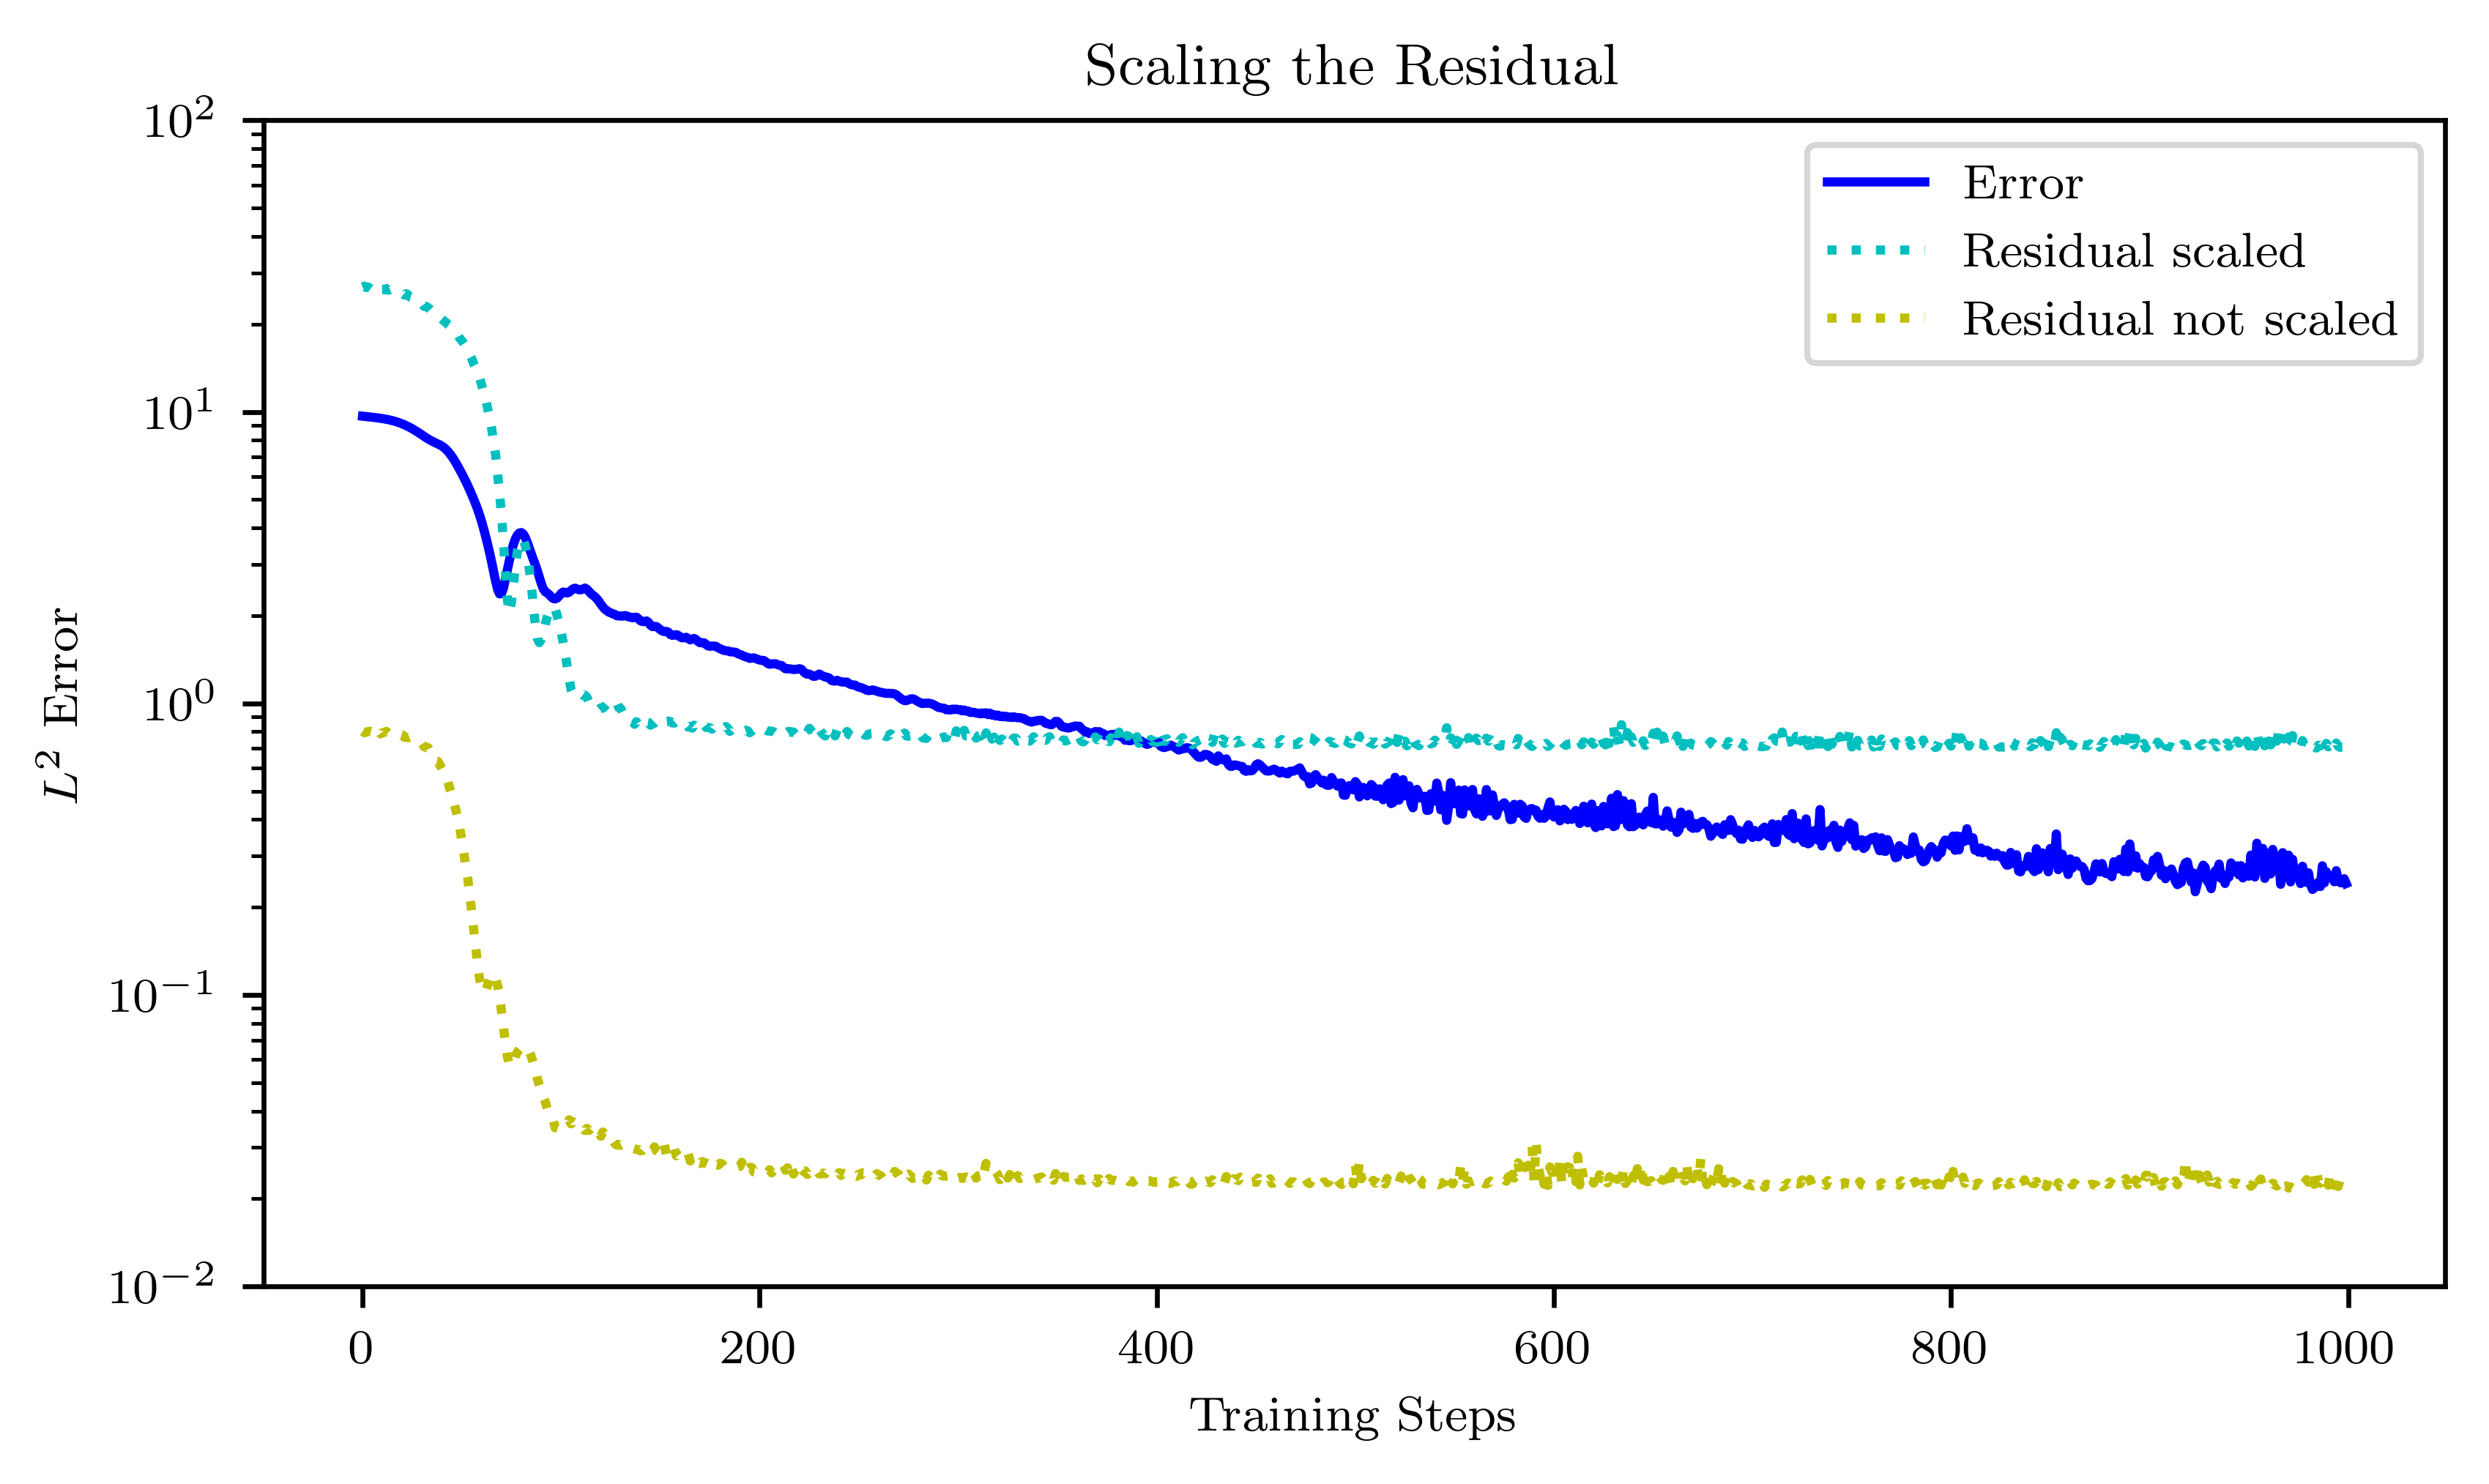

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Scaling the Residual')
ax.set_ylabel(r'$L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-2, 1e2)
ax.semilogy(range(1000), L2dt_errors3[:-1],'b-')
ax.semilogy(range(1000), L2dt_losses3,'c:')
ax.semilogy(range(1000), L2dt_noscale_losses3,'y:')

ax.legend(['Error', 'Residual scaled', 'Residual not scaled'])



#ax.semilogy(range(1000), L2dt_noscale_losses2,'g--')
#ax.semilogy(range(1000), L2dt_noscale_errors2[:-1],'g-')

#ax.semilogy(range(1000), L2dt_noscale_losses3,'r--')
#ax.semilogy(range(1000), L2dt_noscale_errors3[:-1],'r-')

#ax.semilogy(range(1000), L2dt_noscale_losses4,'m--')
#ax.semilogy(range(1000), L2dt_noscale_errors4[:-1],'m-')

#ax.legend([r'$\Delta t = 0.1$', r'$\Delta t = 0.01$', r'$\Delta t = 0.001$', r'$\Delta t = 0.0001$'])


In [8]:
sep4 = 'Separate_4'
sep5 = 'Separate_5'
sep6 = 'Separate_6'
sep7 = 'Separate_7'

with open('experiments/'  + sep4 + '_errors.pickle', 'rb') as f:
    sep_errors4 = pickle.load(f)
with open('experiments/'  + sep5 + '_errors.pickle', 'rb') as f:
    sep_errors5 = pickle.load(f)
with open('experiments/'  + sep6 + '_errors.pickle', 'rb') as f:
    sep_errors6 = pickle.load(f)
with open('experiments/'  + sep7 + '_errors.pickle', 'rb') as f:
    sep_errors7 = pickle.load(f)

L2sep_errors4 = np.sqrt(sep_errors4[:,0,0])/true_L2norm
L2sep_errors5 = np.sqrt(sep_errors5[:,0,0])/true_L2norm
L2sep_errors6 = np.sqrt(sep_errors6[:,0,0])/true_L2norm
L2sep_errors7 = np.sqrt(sep_errors7[:,0,0])/true_L2norm

Linfsep_errors4 = np.sqrt(np.amax(sep_errors4[-1,:,1]))
Linfsep_errors5 = np.sqrt(np.amax(sep_errors5[-1,:,1]))
Linfsep_errors6 = np.sqrt(np.amax(sep_errors6[-1,:,1]))
Linfsep_errors7 = np.sqrt(np.amax(sep_errors7[-1,:,1]))

In [9]:
print(Linfsep_errors4)
print(Linfsep_errors5)
print(Linfsep_errors6)
print(Linfsep_errors7)

0.3303244072188911
0.26563204659140105
0.47820381352755
0.24439105310288212


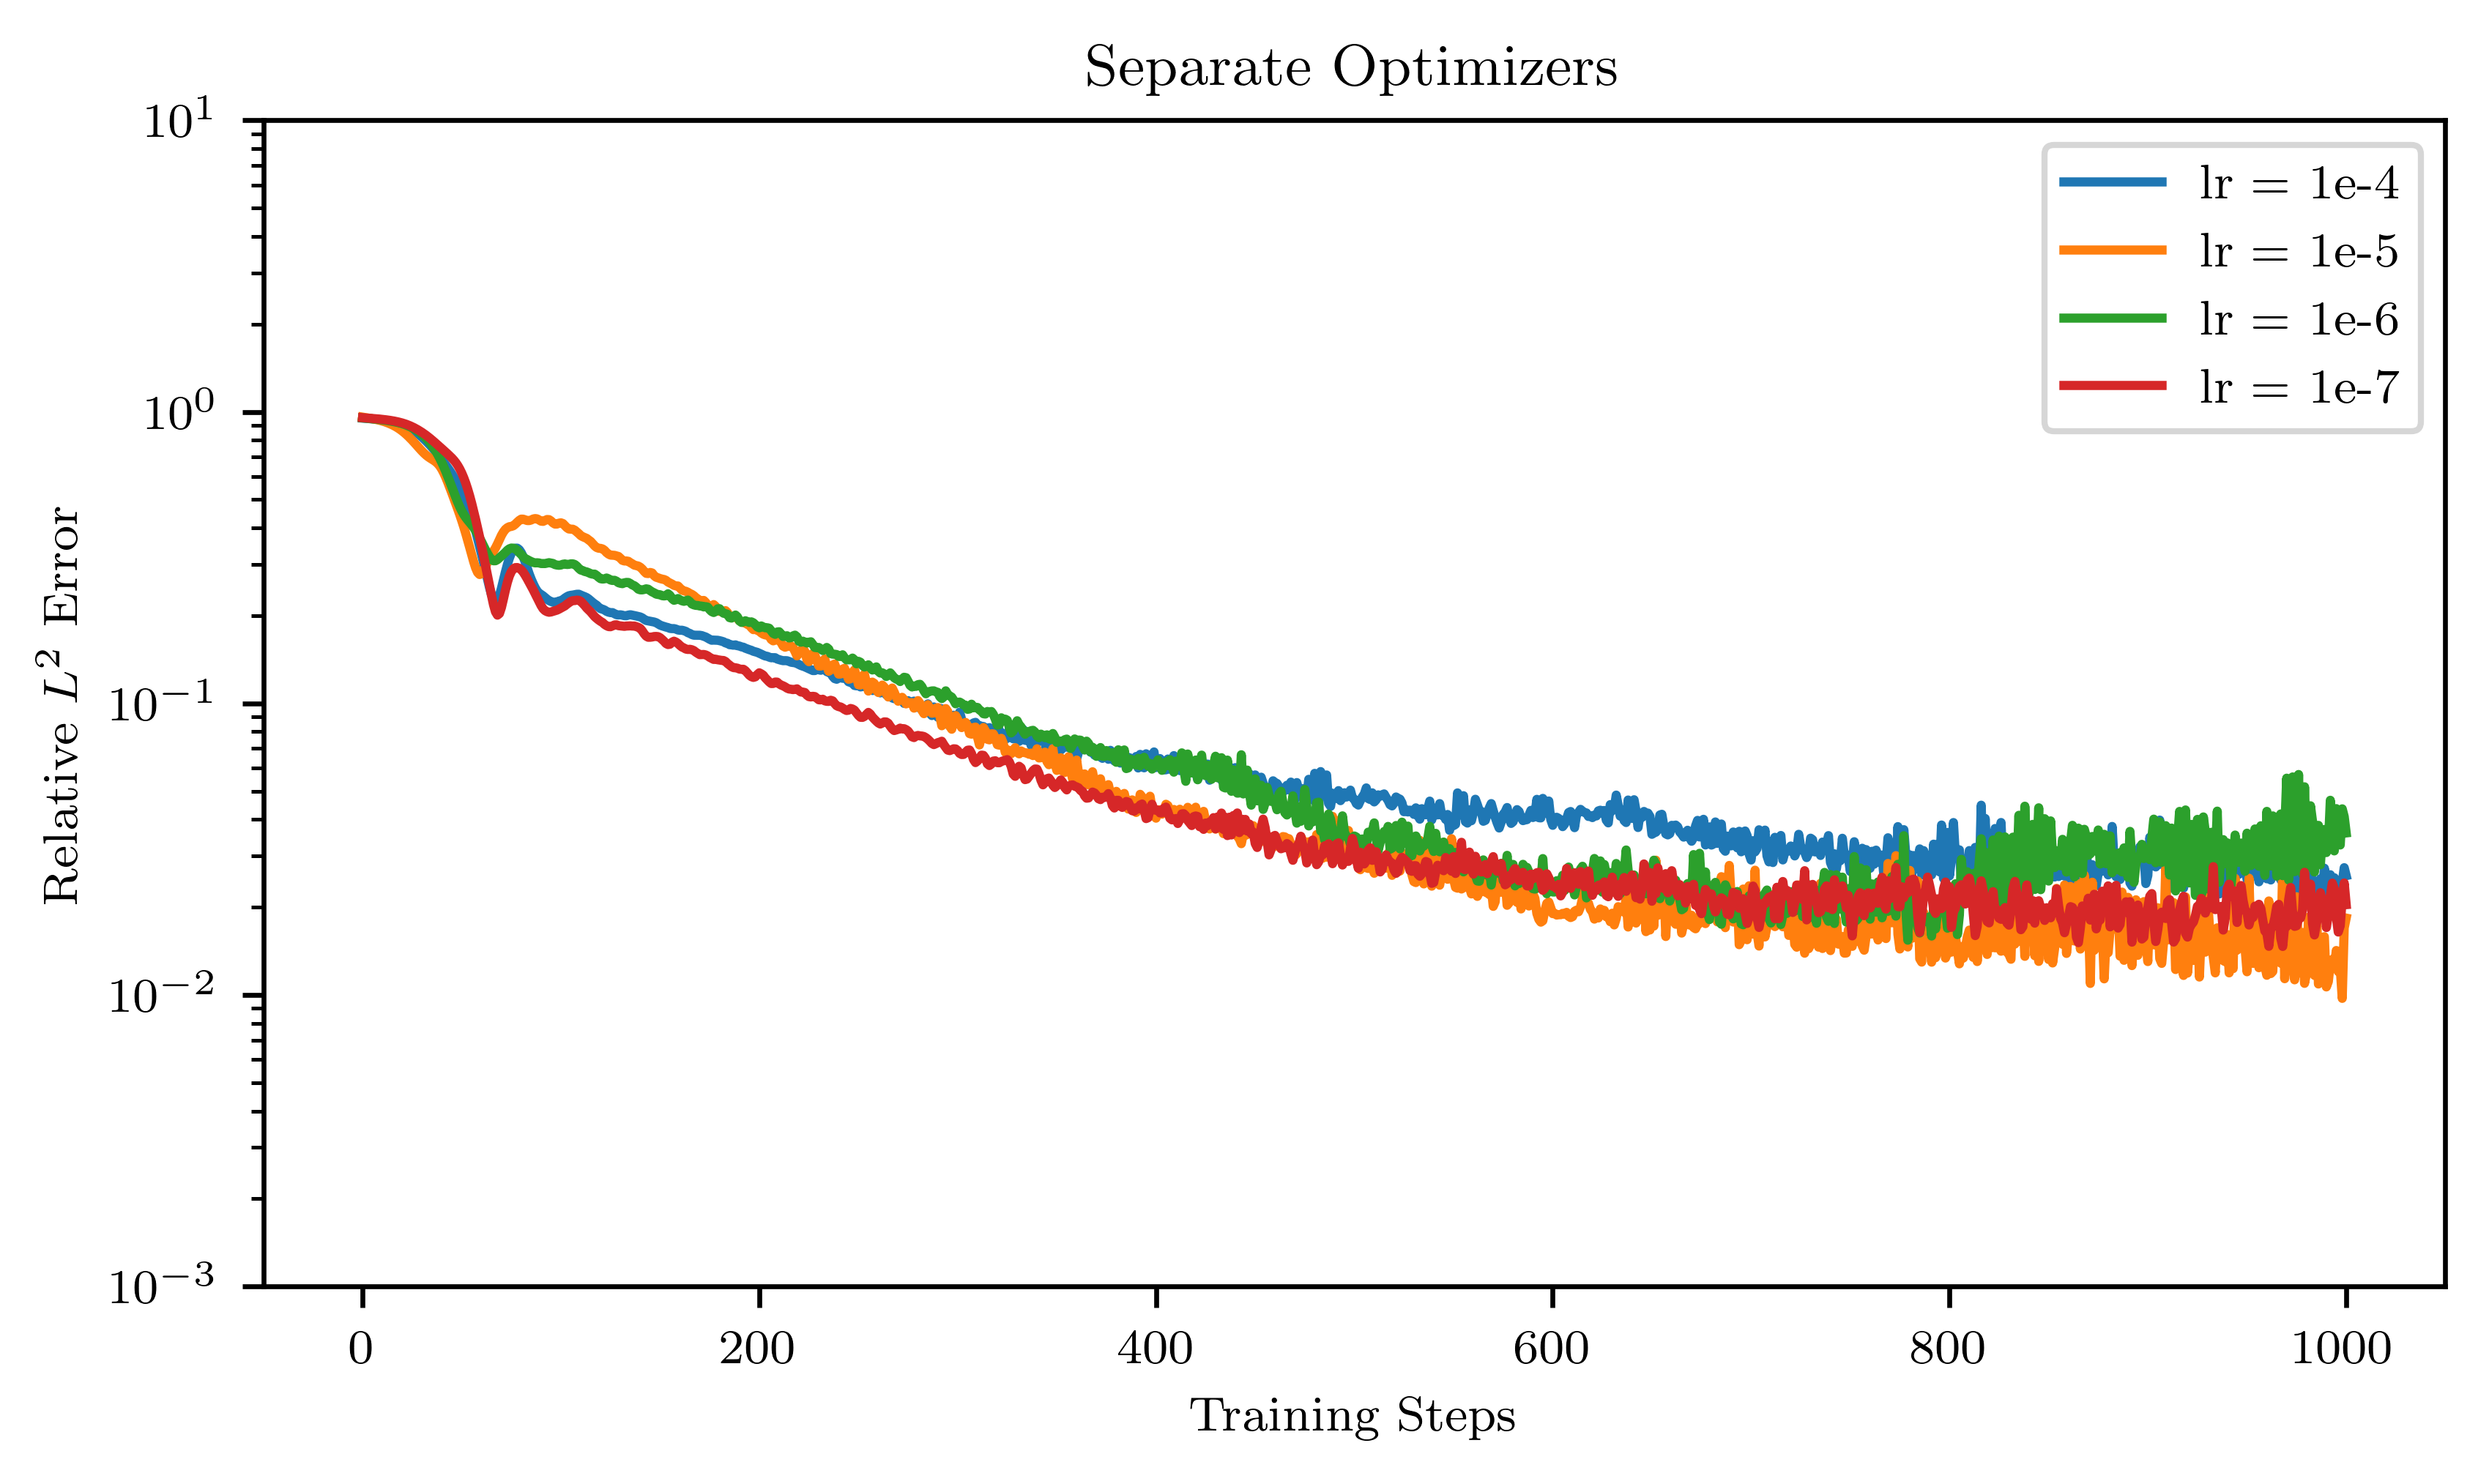

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Separate Optimizers')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)

ax.semilogy(range(1001), L2sep_errors4)
ax.semilogy(range(1001), L2sep_errors5)
ax.semilogy(range(1001), L2sep_errors6)
ax.semilogy(range(1001), L2sep_errors7)

ax.legend(['lr = 1e-4','lr = 1e-5', 'lr = 1e-6', 'lr = 1e-7'])


In [6]:
bdry0 = 'Stochastic_boundary0'
bdry1 = 'Stochastic_boundary1'
bdry2 = 'Stochastic_boundary2'
bdry3 = 'Stochastic_boundary3'
bdry4 = 'Stochastic_boundary4'
bdry5 = 'Stochastic_boundary5' # bdry = 1e1
bdry6 = 'Stochastic_boundary6' # bdry = 1e2

with open('experiments/'  + bdry0 + '_errors.pickle', 'rb') as f:
    bdry0_errors = pickle.load(f)
with open('experiments/'  + bdry1 + '_errors.pickle', 'rb') as f:
    bdry1_errors = pickle.load(f)
with open('experiments/'  + bdry2 + '_errors.pickle', 'rb') as f:
    bdry2_errors = pickle.load(f)
with open('experiments/'  + bdry3 + '_errors.pickle', 'rb') as f:
    bdry3_errors = pickle.load(f)
with open('experiments/'  + bdry4 + '_errors.pickle', 'rb') as f:
    bdry4_errors = pickle.load(f)
with open('experiments/'  + bdry5 + '_errors.pickle', 'rb') as f:
    bdry5_errors = pickle.load(f)
with open('experiments/'  + bdry6 + '_errors.pickle', 'rb') as f:
    bdry6_errors = pickle.load(f)

L2bdry0_errors = np.sqrt(bdry0_errors[:,0,0])/true_L2norm
L2bdry1_errors = np.sqrt(bdry1_errors[:,0,0])/true_L2norm
L2bdry2_errors = np.sqrt(bdry2_errors[:,0,0])/true_L2norm
L2bdry3_errors = np.sqrt(bdry3_errors[:,0,0])/true_L2norm
L2bdry4_errors = np.sqrt(bdry4_errors[:,0,0])/true_L2norm
L2bdry5_errors = np.sqrt(bdry5_errors[:,0,0])/true_L2norm
L2bdry6_errors = np.sqrt(bdry6_errors[:,0,0])/true_L2norm

L2bdry0_errorsb = np.sqrt(bdry0_errors[:,1,0])/true_L2norm
L2bdry1_errorsb = np.sqrt(bdry1_errors[:,1,0])/true_L2norm
L2bdry2_errorsb = np.sqrt(bdry2_errors[:,1,0])/true_L2norm
L2bdry3_errorsb = np.sqrt(bdry3_errors[:,1,0])/true_L2norm
L2bdry4_errorsb = np.sqrt(bdry4_errors[:,1,0])/true_L2norm
L2bdry5_errorsb = np.sqrt(bdry5_errors[:,1,0])/true_L2norm
L2bdry6_errorsb = np.sqrt(bdry6_errors[:,1,0])/true_L2norm

Linfbdry0_errors = np.sqrt(np.amax(bdry0_errors[-1,:,1]))
Linfbdry1_errors = np.sqrt(np.amax(bdry1_errors[-1,:,1]))
Linfbdry2_errors = np.sqrt(np.amax(bdry2_errors[-1,:,1]))
Linfbdry3_errors = np.sqrt(np.amax(bdry3_errors[-1,:,1]))
Linfbdry4_errors = np.sqrt(np.amax(bdry4_errors[-1,:,1]))
Linfbdry5_errors = np.sqrt(np.amax(bdry5_errors[-1,:,1]))
Linfbdry6_errors = np.sqrt(np.amax(bdry6_errors[-1,:,1]))

print(Linfbdry0_errors)
print(Linfbdry1_errors)
print(Linfbdry2_errors)
print(Linfbdry3_errors)
print(Linfbdry4_errors)
print(Linfbdry5_errors)
print(Linfbdry6_errors)

2.136062917969727
1.4636779912362305
0.40308687060073667
0.3140967523324527
0.34395133340368966
0.2441076048358255
0.3650586131434075


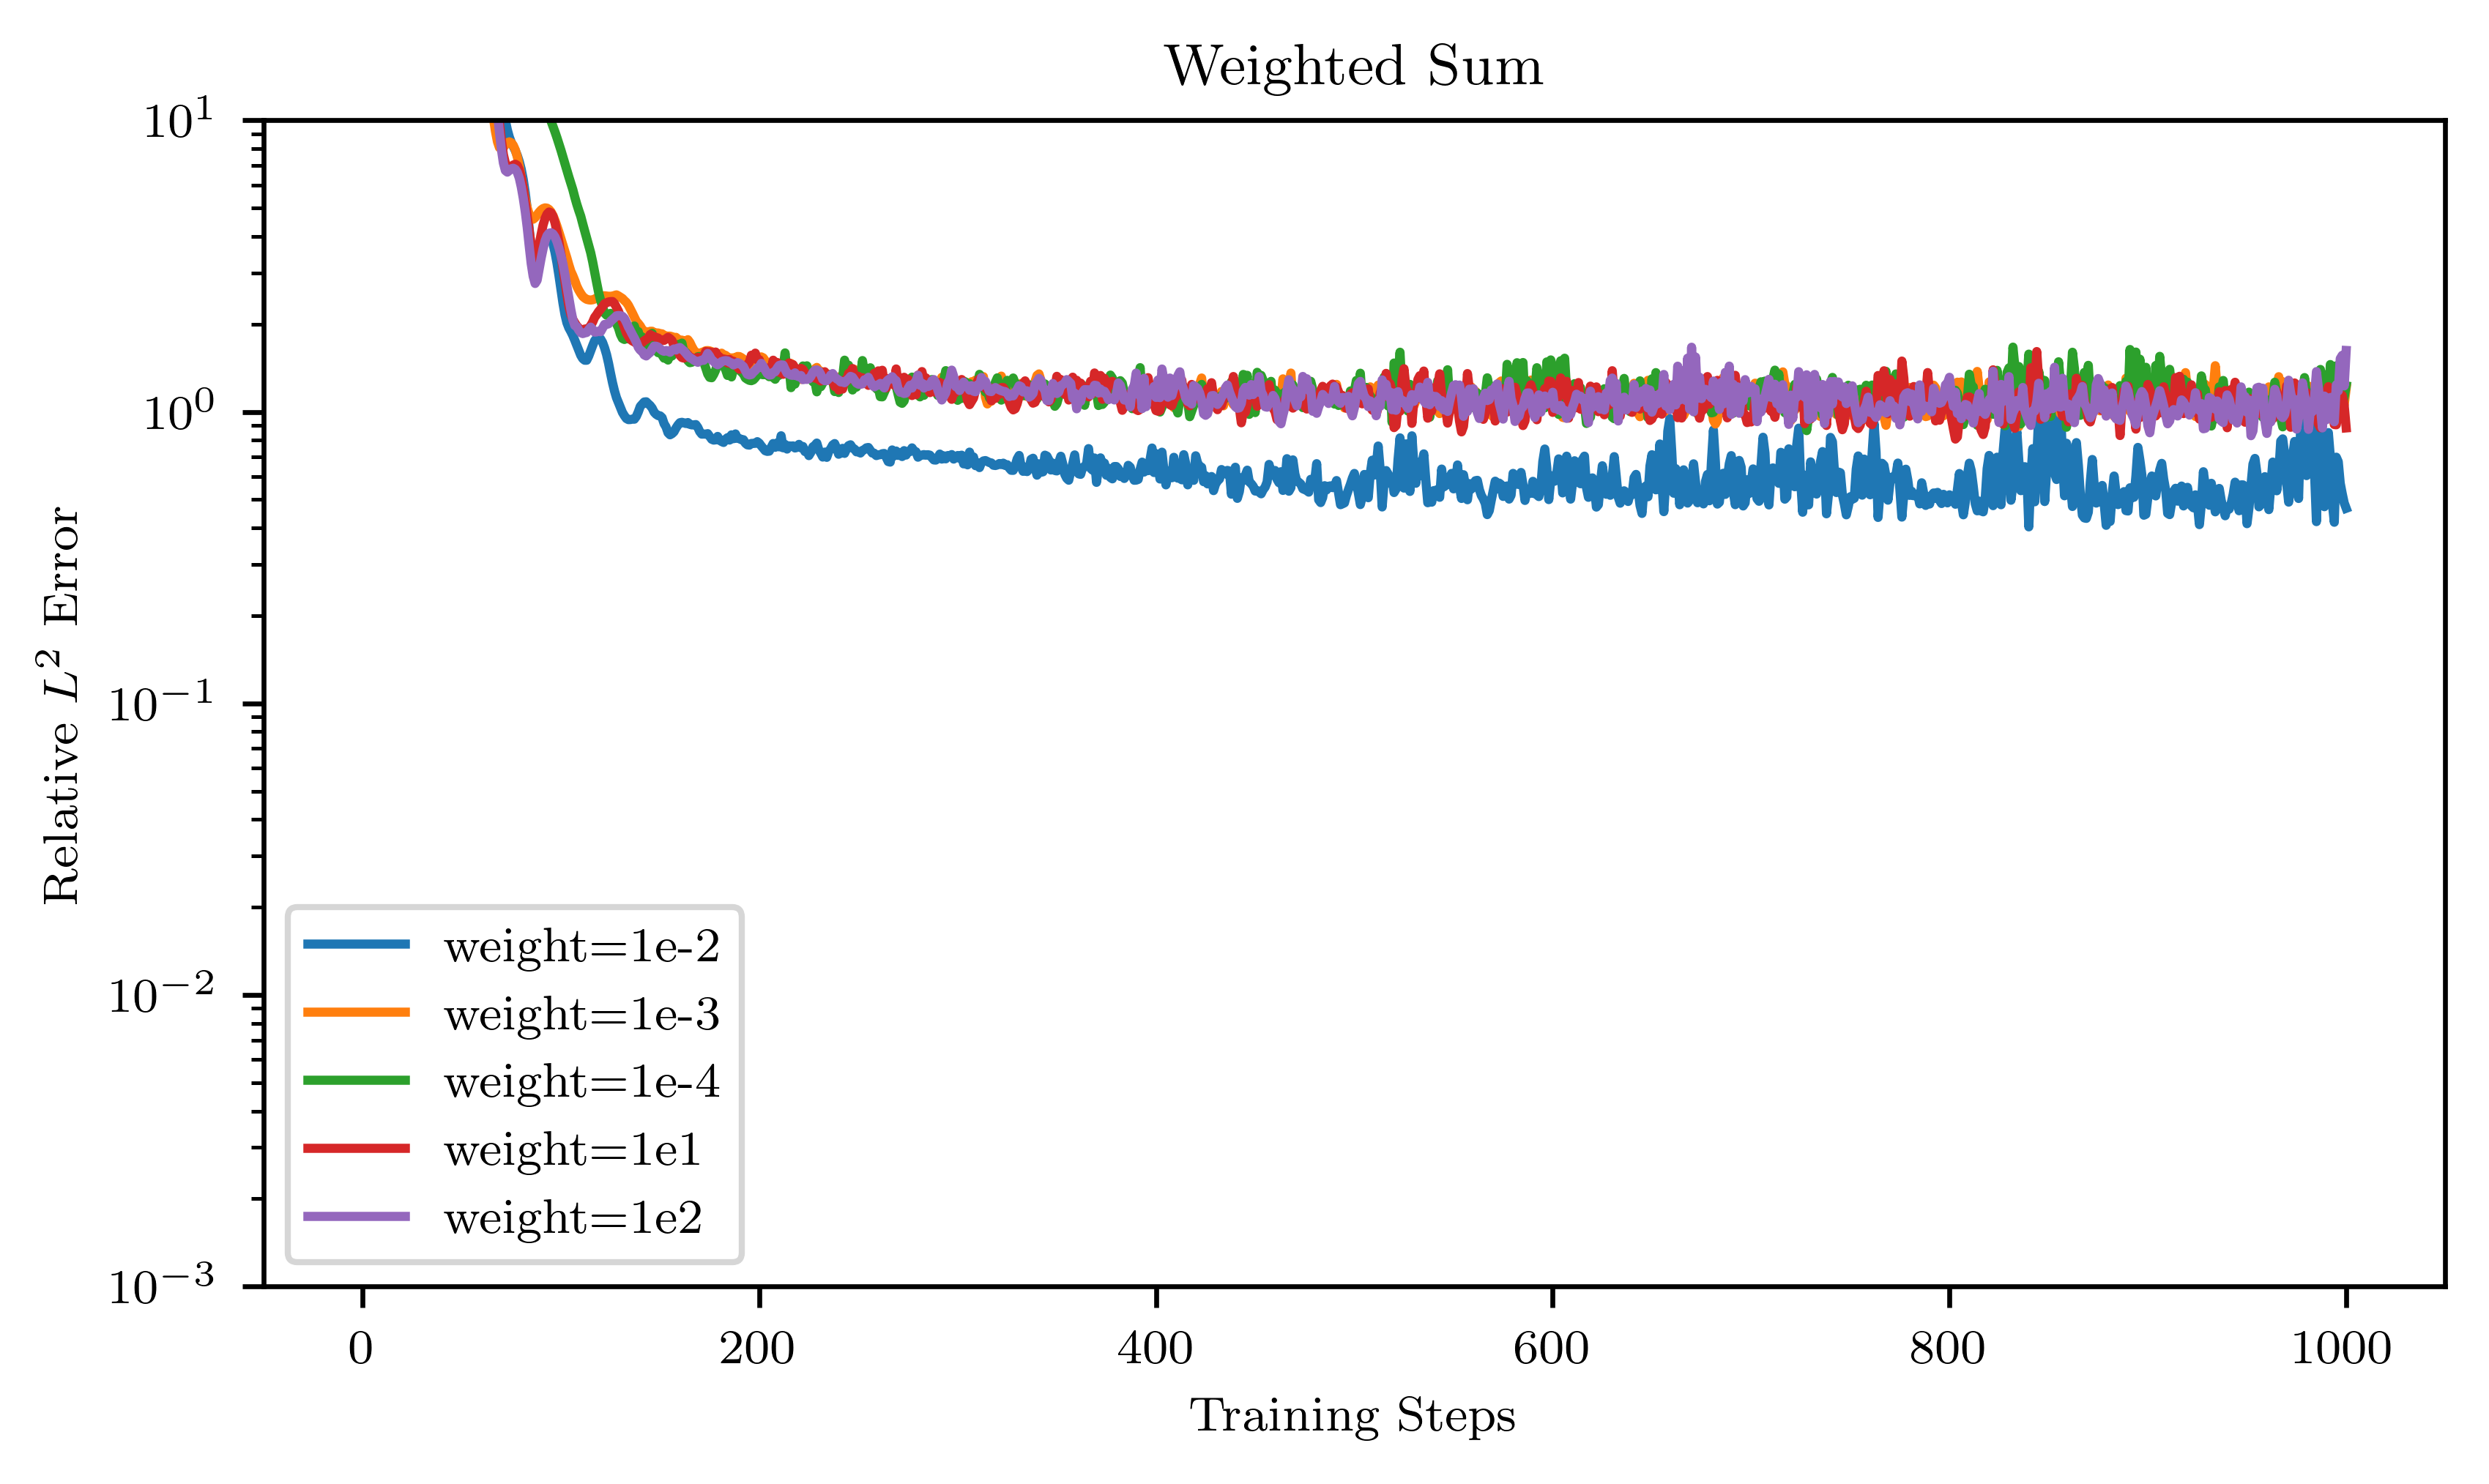

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Weighted Sum')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)

#ax.semilogy(range(1001), L2bdry2_errors)
#ax.semilogy(range(1001), L2bdry3_errors)
#ax.semilogy(range(1001), L2bdry4_errors)
#ax.semilogy(range(1001), L2bdry5_errors)
#ax.semilogy(range(1001), L2bdry6_errors)

ax.semilogy(range(1001), L2bdry2_errorsb)
ax.semilogy(range(1001), L2bdry3_errorsb)
ax.semilogy(range(1001), L2bdry4_errorsb)
ax.semilogy(range(1001), L2bdry5_errorsb)
ax.semilogy(range(1001), L2bdry6_errorsb)


ax.legend(['weight=1e-2', 'weight=1e-3',
            'weight=1e-4','weight=1e1', 'weight=1e2'])

In [27]:
none = 'Stochastic_none'
sep = 'Separate_5'
# Pick Best boundary
bdry = 'Stochastic_boundary3'

with open('experiments/'  + none + '_errors.pickle', 'rb') as f:
    none_errors = pickle.load(f)
with open('experiments/'  + sep + '_errors.pickle', 'rb') as f:
    sep_errors = pickle.load(f)
with open('experiments/'  + bdry + '_errors.pickle', 'rb') as f:
    bdry_errors = pickle.load(f)

L2none_errors = np.sqrt(none_errors[:,0,0])/true_L2norm
L2sep_errors = np.sqrt(sep_errors[:,0,0])/true_L2norm
L2bdry_errors = np.sqrt(bdry_errors[:,0,0])/true_L2norm

Linfnone_errors = np.sqrt(np.amax(none_errors[:,:,1], axis=1))
Linfsep_errors = np.sqrt(np.amax(sep_errors[:,:,1], axis=1))
Linfbdry_errors = np.sqrt(np.amax(bdry_errors[:,:,1], axis=1))

print(Linfnone_errors[-1])
print(Linfsep_errors[-1])
print(Linfbdry_errors[-1])

0.3550353111875788
0.26563204659140105
0.3140967523324527


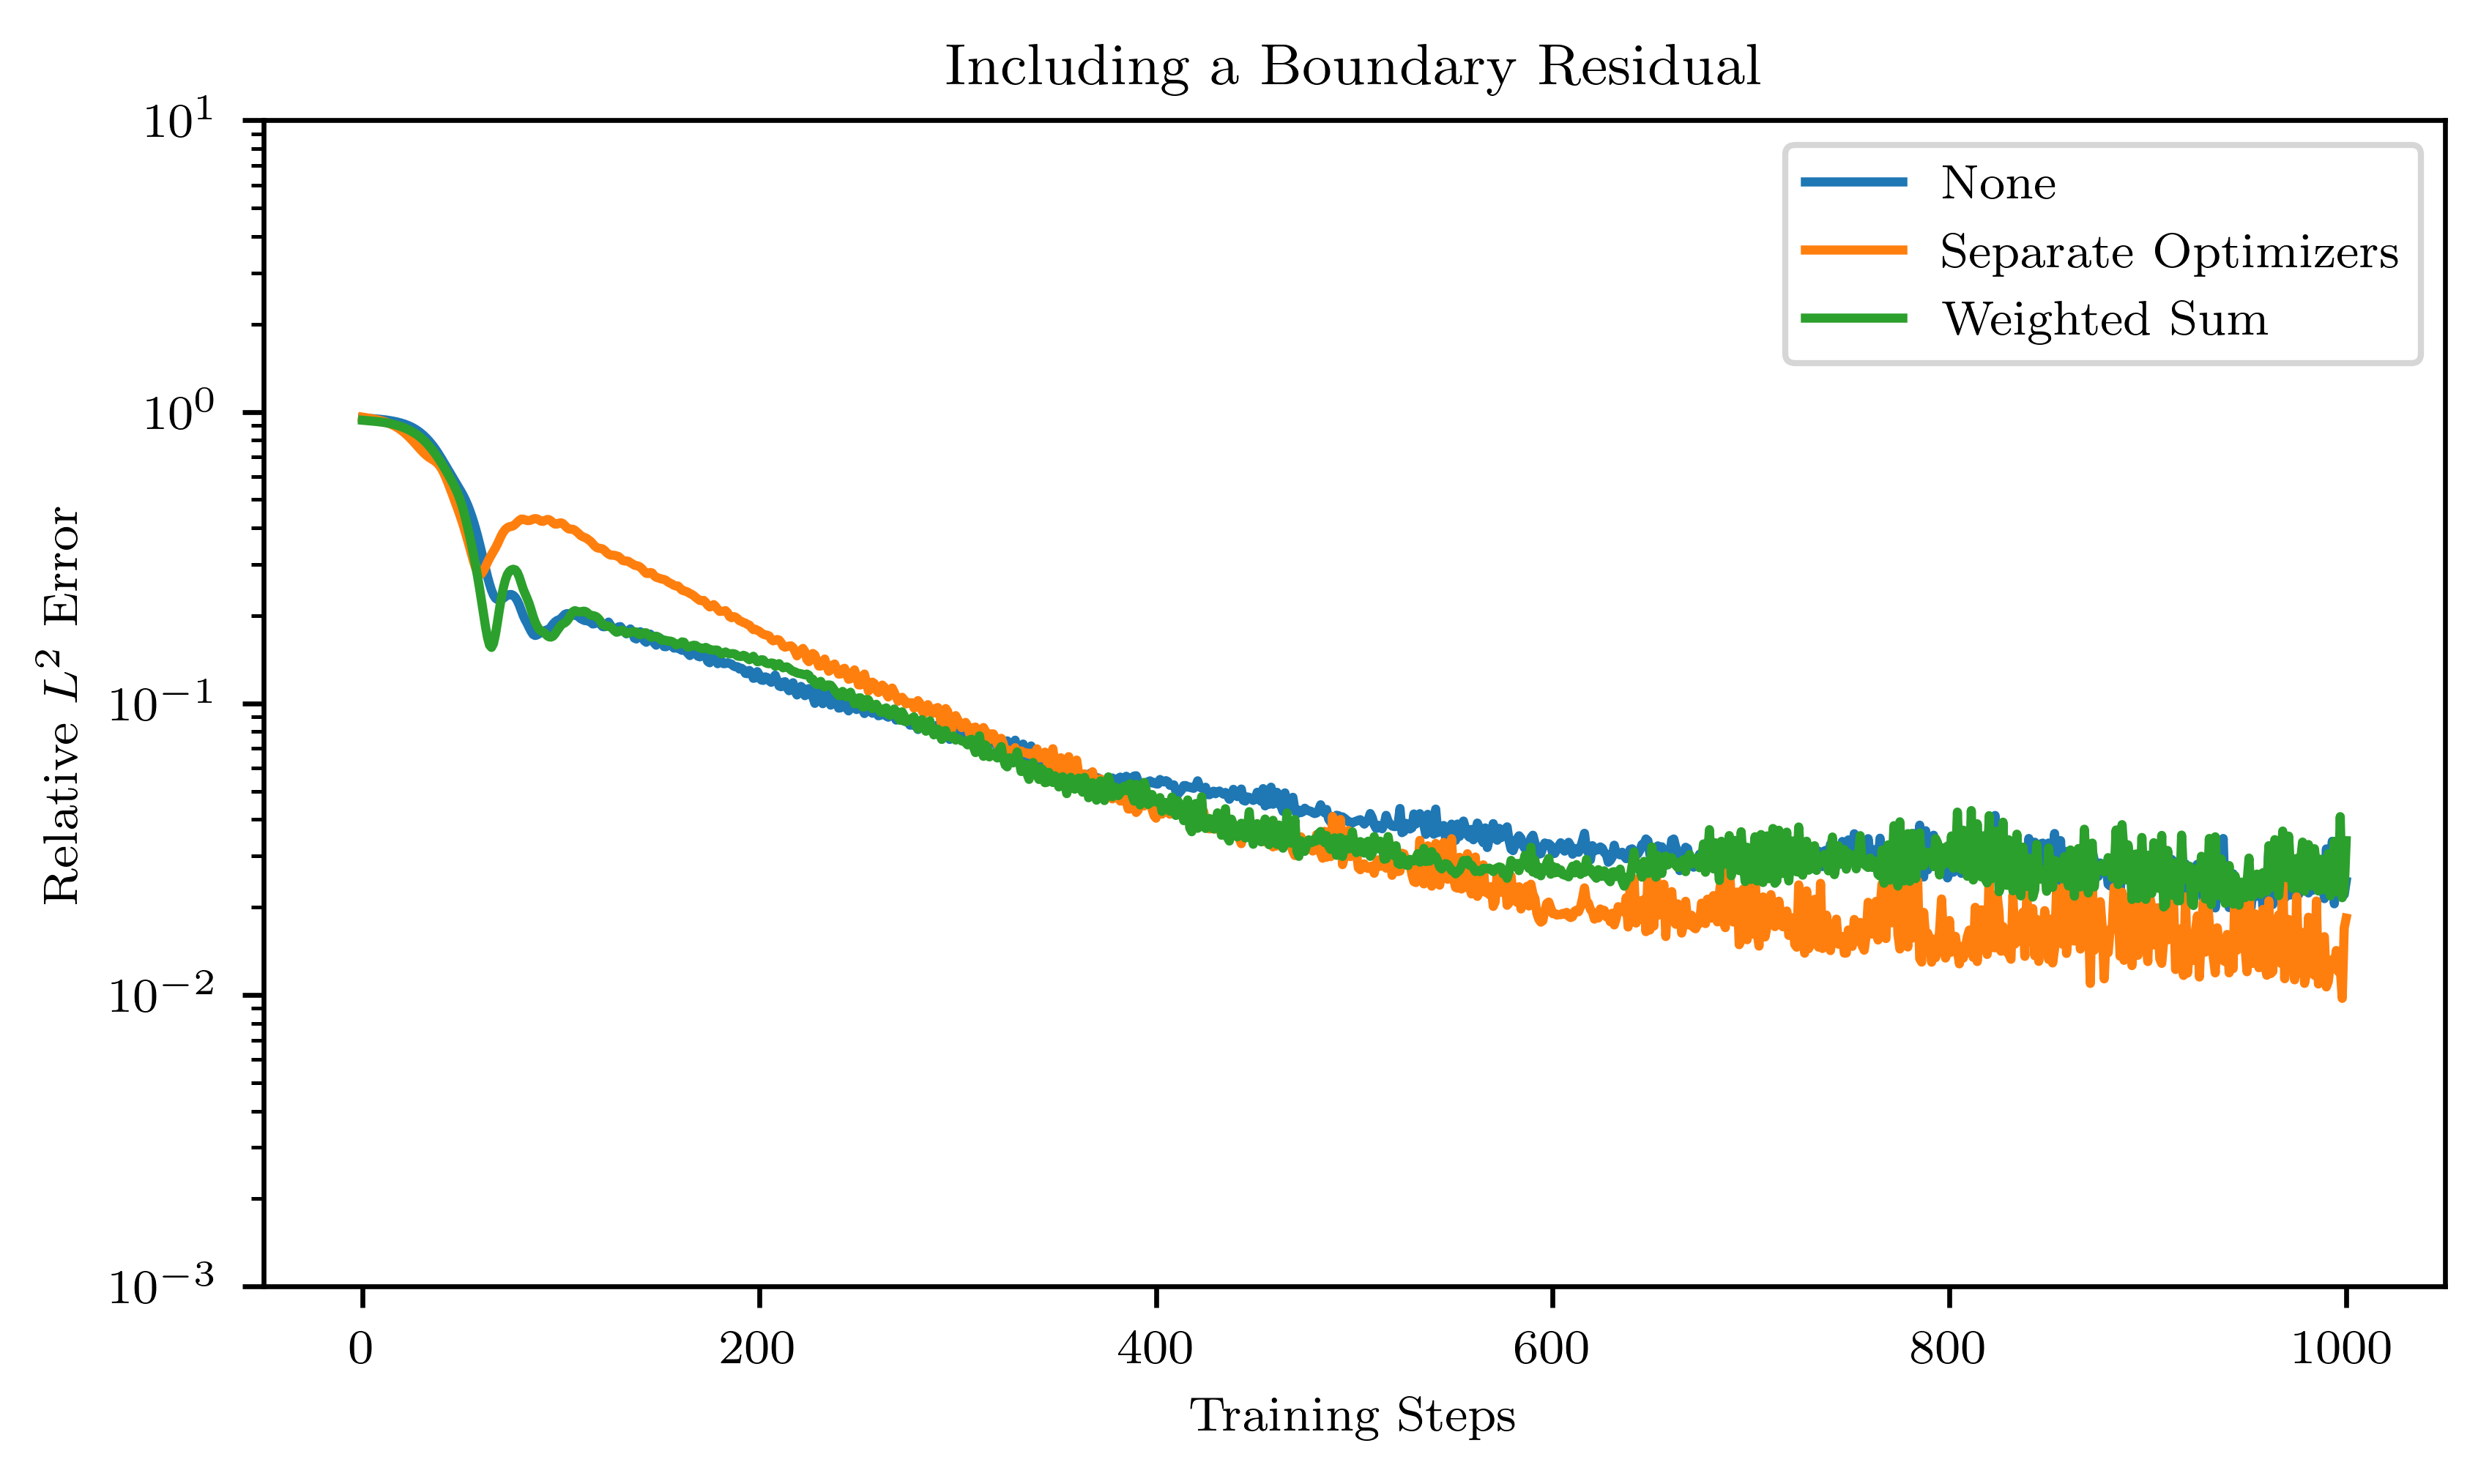

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Including a Boundary Residual')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)

ax.semilogy(range(1001), L2none_errors)
ax.semilogy(range(1001), L2sep_errors)
ax.semilogy(range(1001), L2bdry_errors)

#ax.semilogy(range(1001), Linfnone_errors )
#ax.semilogy(range(1001), Linfsep_errors)
#ax.semilogy(range(1001), Linfbdry_errors)


ax.legend(['None', 'Separate Optimizers', 'Weighted Sum'
           ])


In [29]:
none = 'Stochastic_boundary3'
move = 'Move'
resample = 'Resample'
importance = 'Importance'

with open('experiments/'  + none + '_errors.pickle', 'rb') as f:
    none_errors = pickle.load(f)
with open('experiments/'  + move + '_errors.pickle', 'rb') as f:
    move_errors = pickle.load(f)
with open('experiments/'  + resample + '_errors.pickle', 'rb') as f:
    resample_errors = pickle.load(f)
with open('experiments/'  + importance + '_errors.pickle', 'rb') as f:
    importance_errors = pickle.load(f)

L2none_errors = np.sqrt(none_errors[:,0,0])/true_L2norm
L2move_errors = np.sqrt(move_errors[:,0,0])/true_L2norm
L2resample_errors = np.sqrt(resample_errors[:,0,0])/true_L2norm
L2importance_errors = np.sqrt(importance_errors[:,0,0])/true_L2norm

Linfnone_errors = np.sqrt(np.amax(none_errors[:,:,1], axis=1))
Linfmove_errors = np.sqrt(np.amax(move_errors[:,:,1], axis=1))
Linfresample_errors = np.sqrt(np.amax(resample_errors[:,:,1], axis=1))
Linfimportance_errors = np.sqrt(np.amax(importance_errors[:,:,1], axis=1))

print(Linfnone_errors[-1])
print(Linfmove_errors[-1])
print(Linfresample_errors[-1])
print(Linfimportance_errors[-1])

0.3140967523324527
0.5905649512910314
0.26585400154298267
0.2875720668871331


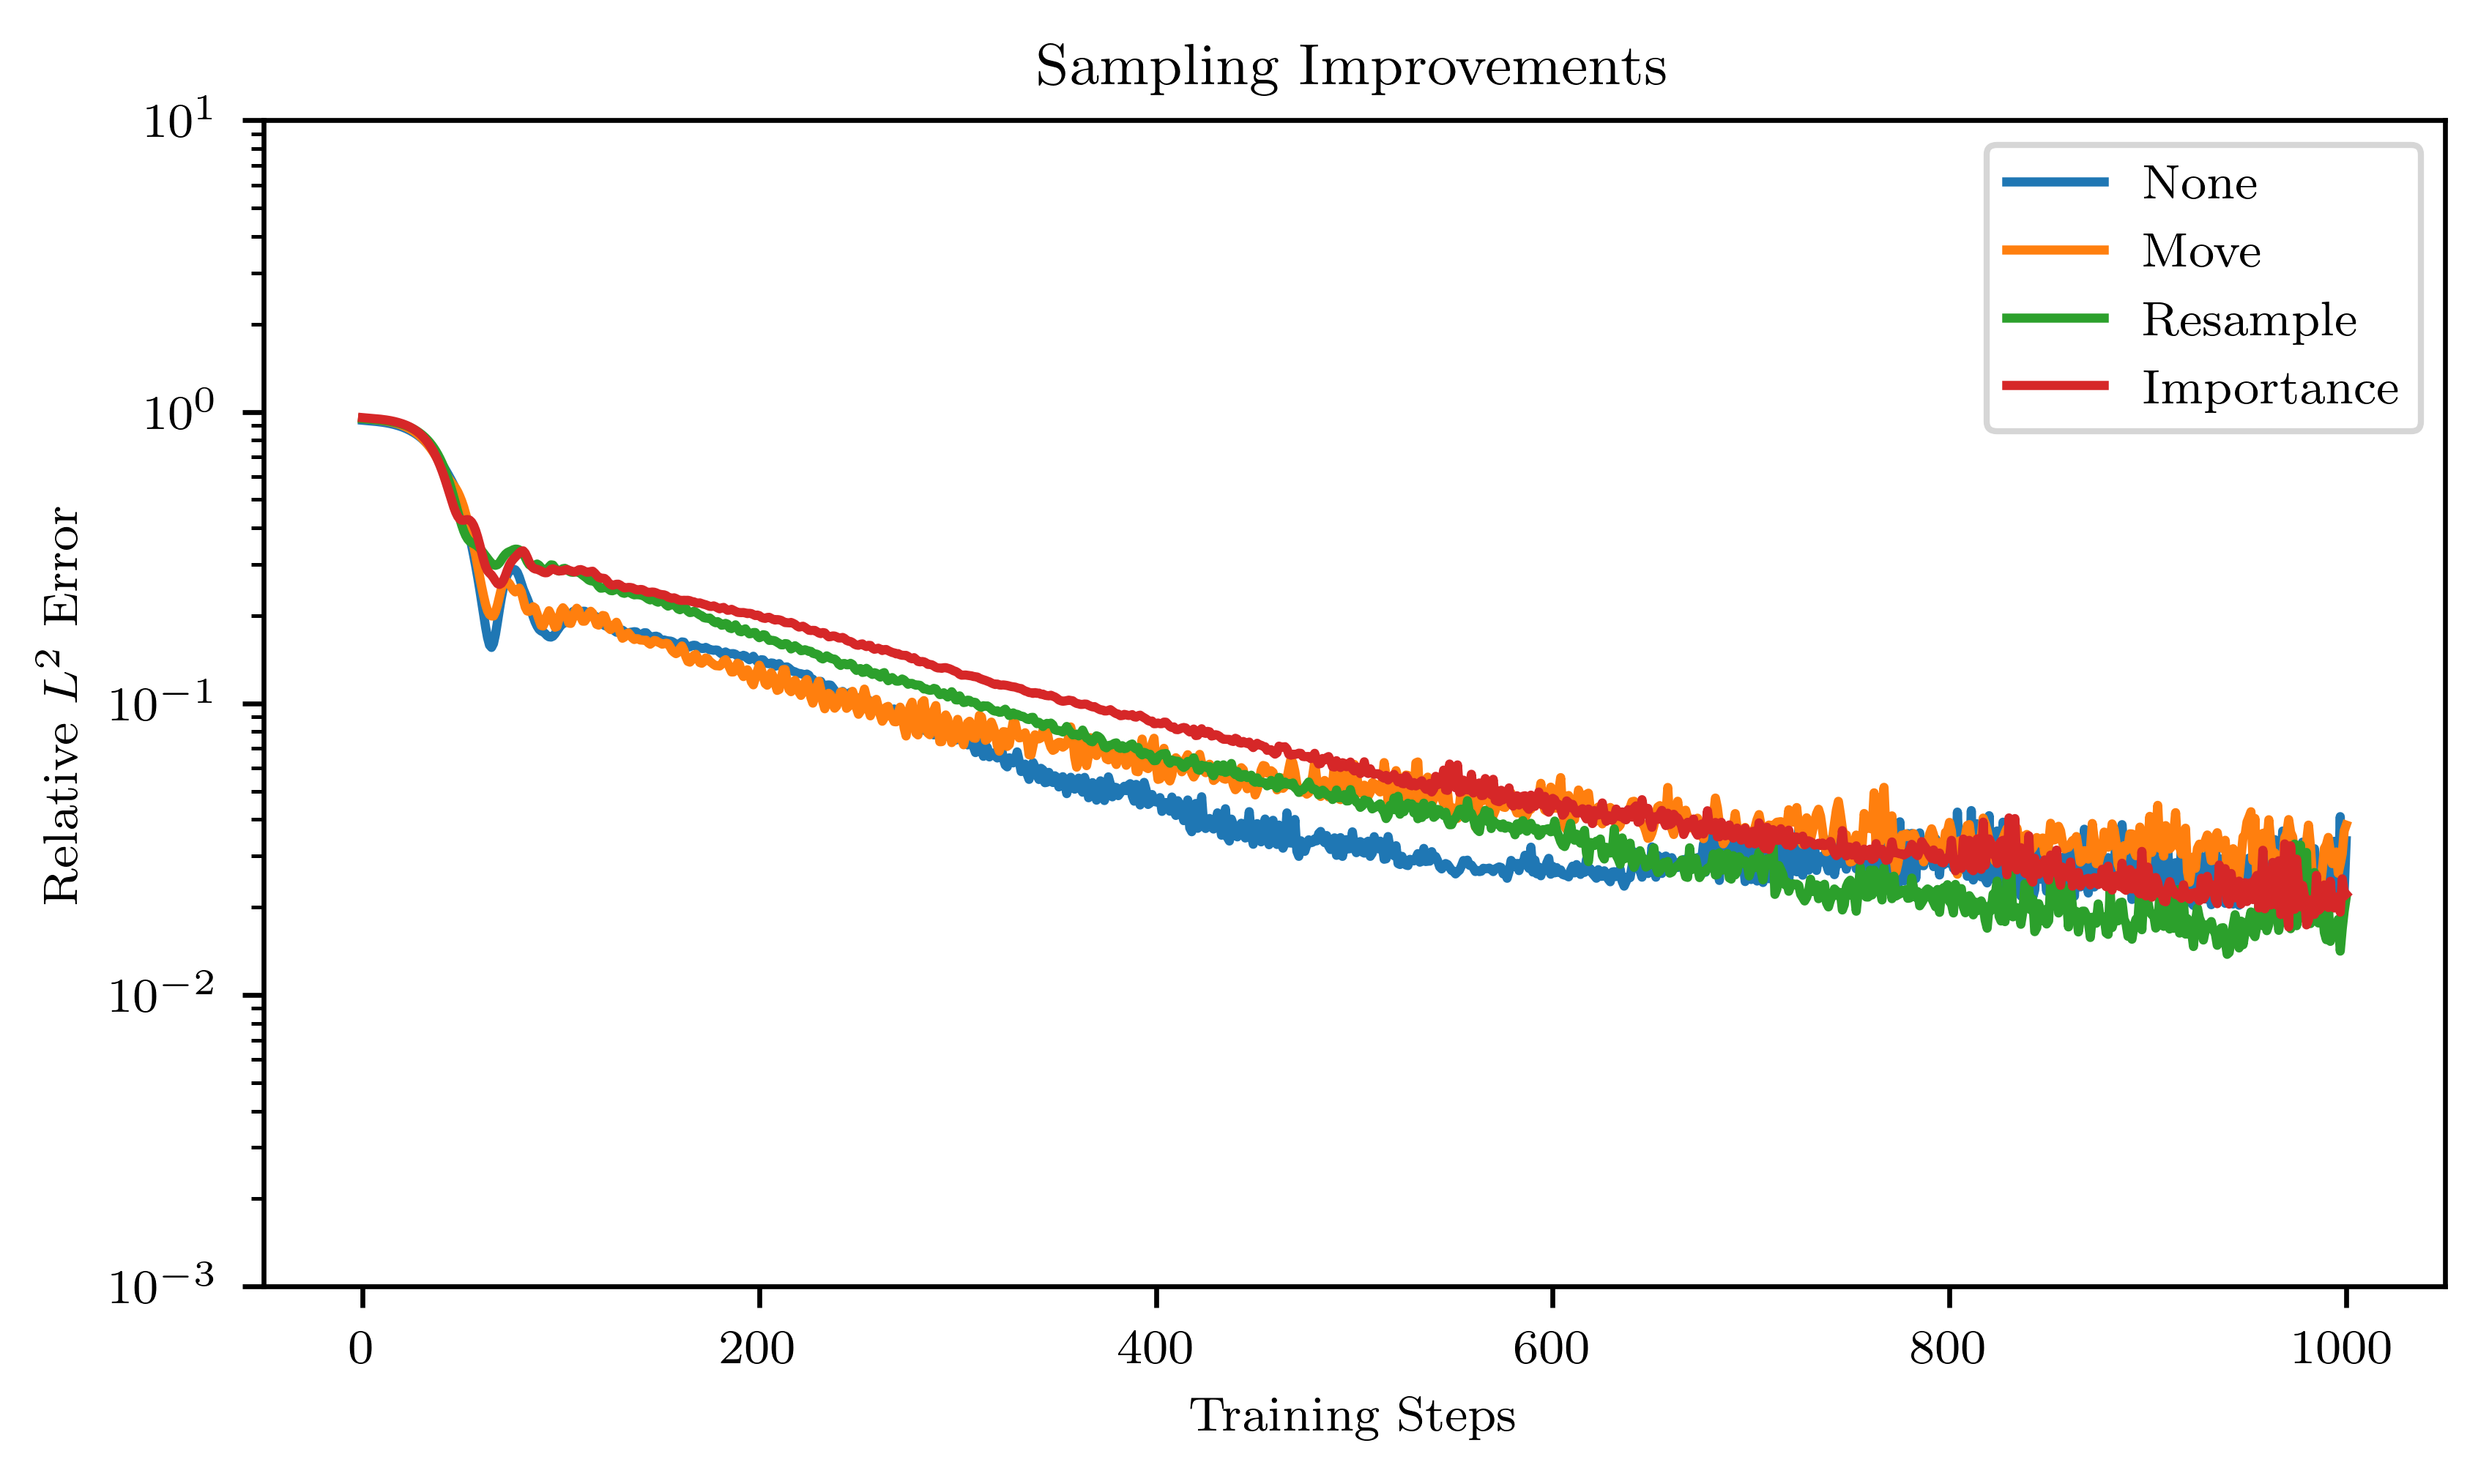

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title(r'Sampling Improvements')
ax.set_ylabel(r'Relative $L^2$ Error')
ax.set_xlabel('Training Steps')

ax.set_ylim(1e-3, 1e1)

ax.semilogy(range(1001), L2none_errors)
ax.semilogy(range(1001), L2move_errors)
ax.semilogy(range(1001), L2resample_errors)
ax.semilogy(range(1001), L2importance_errors)

#ax.semilogy(range(1001), Linfnone_errors )
#ax.semilogy(range(1001), Linfsep_errors)
#ax.semilogy(range(1001), Linfbdry_errors)


ax.legend(['None', 'Move', 'Resample', 'Importance'])
